# Ch. 5

In [1]:
# minimal imports
import pandas as pd
import numpy as np
from plotnine import *
import plotnine as p9

# for graphical enhancement
from mizani.formatters import date_format, percent_format, dollar_format, comma_format
from pysocviz.properties import colors

# to handle with categorical variables with na
from pysocviz.utils import redefine_cat_with_na

# you may need them If only you are adhere to color determination...
from matplotlib.pylab import cm
from matplotlib.colors import rgb2hex

# dataset packages
from pysocviz.reader import load_dataset
from gapminder import gapminder

gss_sm = load_dataset('gss_sm')
organdata = load_dataset('organdata')
# transform to a categorical variable
organdata['world'] = pd.Categorical(
    organdata['world'].str.replace('nan', 'NA'),
    ['Liberal', 'Corporatist', 'SocDem', 'NA']
)
elections_historic = load_dataset('elections_historic')

p9.options.figure_size = (6, 6)
theme_set(theme_minimal(base_family='Noto Sans CJK JP'))

## Fig. 5.2

As same as Fig. 4.9, I set manual color mapping.

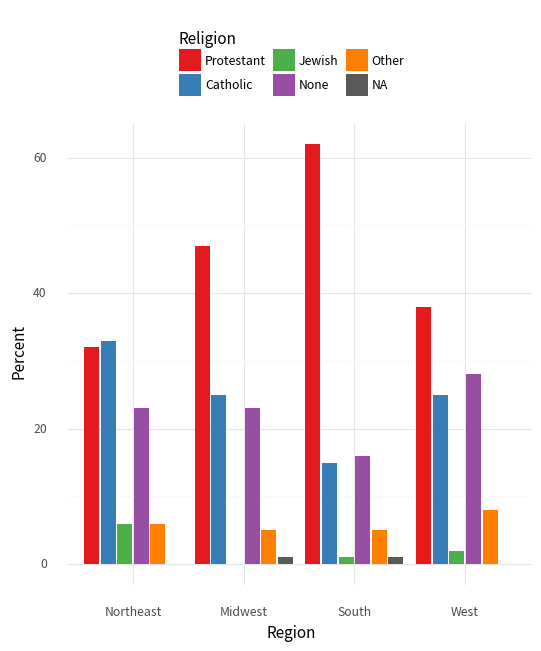

<ggplot: (8793246438379)>

In [2]:
rel_by_region = gss_sm.assign(
    N=1,
    religion=lambda d: redefine_cat_with_na(d['religion'])
).groupby(['bigregion', 'religion'])['N'].count()

rel_by_region = pd.DataFrame(
  {
    'N': rel_by_region,
    'freq': rel_by_region / rel_by_region.reset_index(
      ).groupby(['bigregion'])['N'].sum()
  }
).assign(pct=lambda d: (d['freq'] * 100).round(0)).reset_index()

religion_colors = cm.get_cmap('Set1')
religion_colors = {
  str(rel_by_region['religion'].unique()[i]): rgb2hex(religion_colors(i)
    ) for i in range(religion_colors.N) if i < rel_by_region['religion'].unique().shape[0]
}
religion_colors['NA'] = '#595959'


p = ggplot(rel_by_region, aes(x='bigregion', y='pct', fill='religion'))
p + geom_col(position='dodge2') + labs(
  x="Region",
  y="Percent",
  fill="Religion"
) + theme(legend_position="top"
) + scale_fill_manual(religion_colors)

## Fig. 5.3

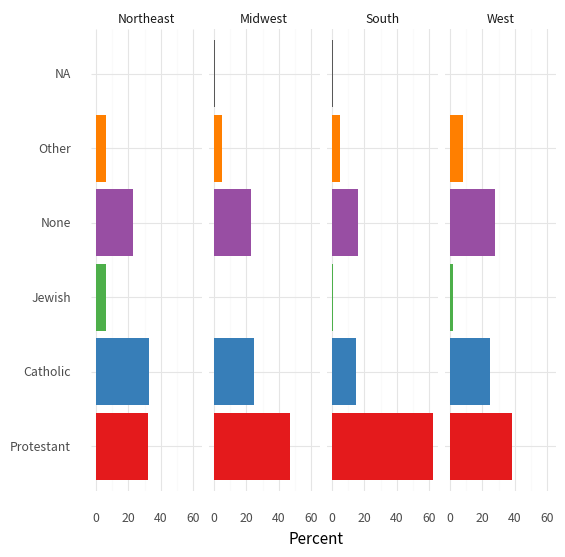

<ggplot: (8793204524752)>

In [3]:
p = ggplot(rel_by_region, aes(x='religion', y='pct', fill='religion'))
p + geom_col(position="dodge2") + labs(
  x=None,
  y="Percent",
  fill="Religion"
) + guides(fill=False) + coord_flip(
) + facet_grid(['.', 'bigregion']
) + scale_fill_manual(religion_colors)

## Fig. 5.4

NOTE: Currently (v0.8) Plotnine doesn't automatically adjust datetime label formats in the each axis (`year` variable used in Ch.4 is integer). So in this notebook I manually adjusted by adding `scale_x_date()` with `date_lables` arguments. `scale_x_date` is an alias of `scale_x_datetime`.

/usr/local/lib/python3.8/dist-packages/plotnine/layer.py:401: PlotnineWarning: geom_point : Removed 34 rows containing missing values.


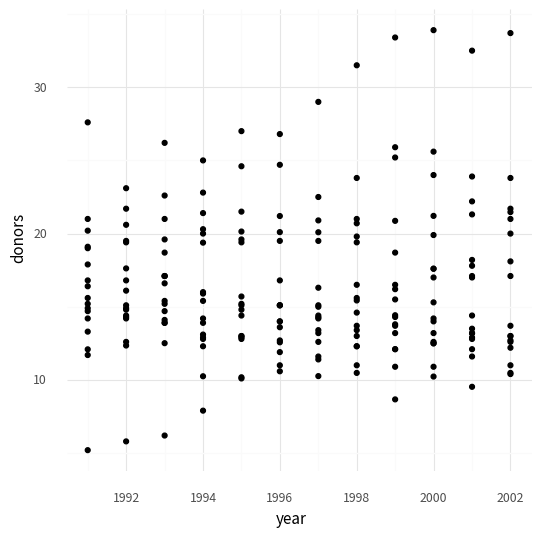

<ggplot: (8793204401839)>

In [4]:
p = ggplot(organdata, aes(x='year', y='donors'))
p + geom_point() + scale_x_date(date_labels='%Y')

/usr/local/lib/python3.8/dist-packages/plotnine/geoms/geom_path.py:75: PlotnineWarning: geom_path: Removed 2 rows containing missing values.


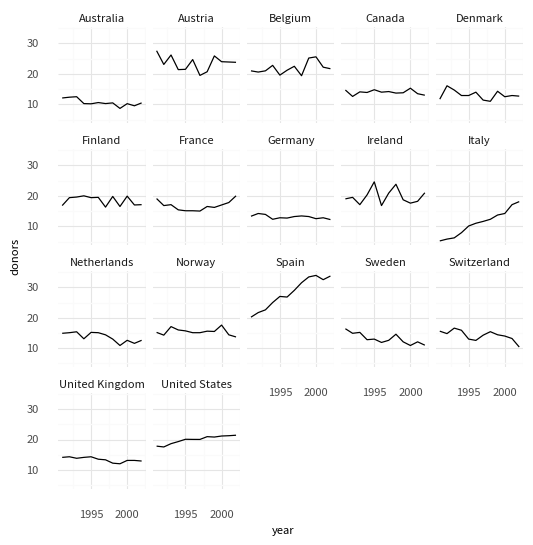

<ggplot: (8793204374550)>

In [5]:
# Fig. 5.5
# Currently (v0.8) sometimes manually thinning of breaks needed
p = ggplot(organdata, aes(x='year', y='donors'))
p + geom_line(
  aes(group='country')
) + facet_wrap(['country']
) + scale_x_date(date_labels='%Y', date_breaks='5 years') + theme(
    text=element_text(size=8)
)

## Fig. 5.6

NOTE: In the online version of the original book, axis labels are overlapped, but in the paper version, the author adjust by using `theme()` function. So I also use text rotation in the following example. (in ggplot2, argument name `angle` but in plotnine, the counterpart is named as `rotation`)

/usr/local/lib/python3.8/dist-packages/plotnine/layer.py:324: PlotnineWarning: stat_boxplot : Removed 34 rows containing non-finite values.


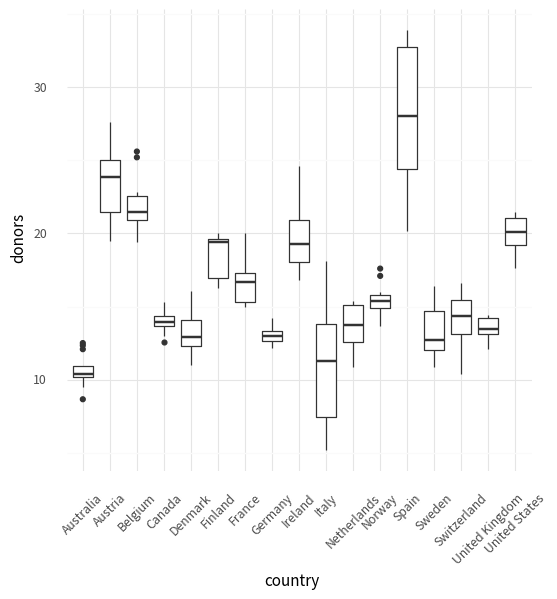

<ggplot: (8793204016887)>

In [6]:
p = ggplot(organdata, aes(x='country', y='donors'))
p + geom_boxplot() + theme(
    axis_text_x=element_text(rotation=45)
)

## Fig. 5.7

/usr/local/lib/python3.8/dist-packages/plotnine/layer.py:324: PlotnineWarning: stat_boxplot : Removed 34 rows containing non-finite values.


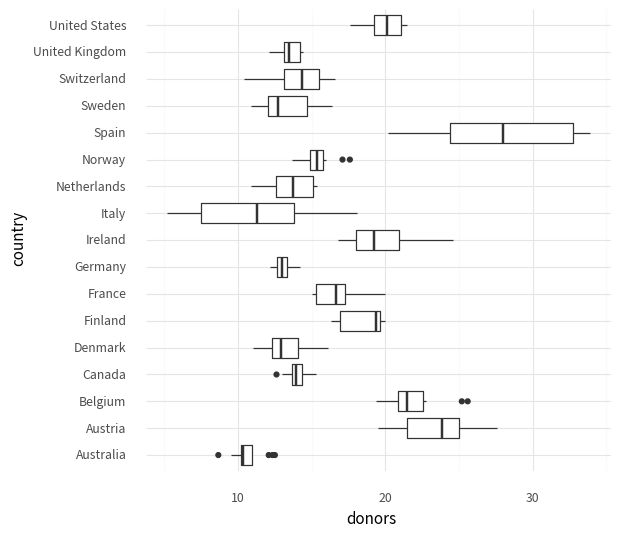

<ggplot: (8793203938901)>

In [7]:
p = ggplot(organdata, aes(x='country', y='donors'))
p + geom_boxplot() + coord_flip()

## Fig. 5.8

NOTE: Differnt from ggplot2, plotnine's `reorder` function doesn't have options, so in the following plot, the order of countries are wrong. 

/usr/local/lib/python3.8/dist-packages/plotnine/layer.py:324: PlotnineWarning: stat_boxplot : Removed 34 rows containing non-finite values.


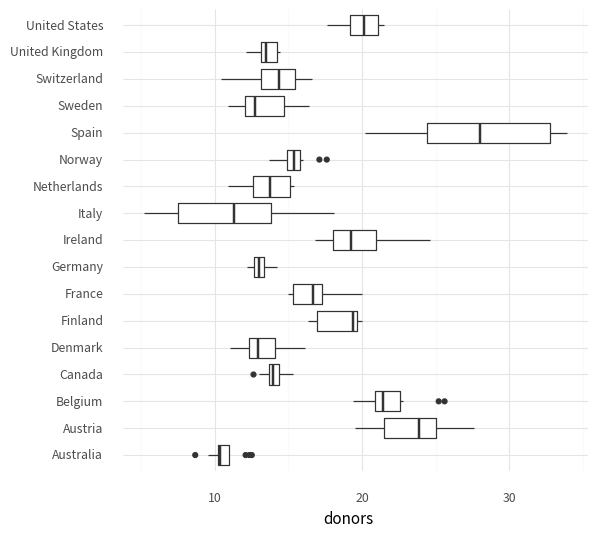

<ggplot: (8793203847924)>

In [8]:
p = ggplot(organdata, aes(x='reorder(country, donors)', y='donors'))
p + geom_boxplot() + labs(x=None) + coord_flip()

So, you need to manually find the true order of donors in mean and apply it:

/usr/local/lib/python3.8/dist-packages/plotnine/layer.py:324: PlotnineWarning: stat_boxplot : Removed 34 rows containing non-finite values.


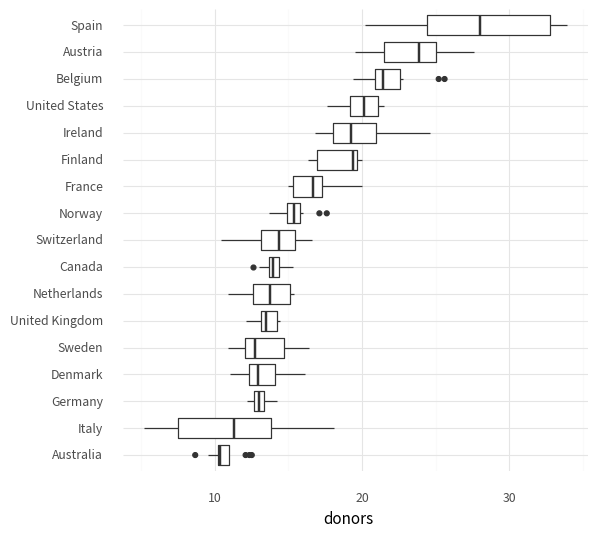

<ggplot: (8793246385628)>

In [9]:
order_countries = organdata.groupby('country')[['donors']].mean(
).sort_values('donors', ascending=True).assign(
    rank_donors=lambda d: range(d.shape[0])
)[['rank_donors']].reset_index()

p = ggplot(
    organdata.merge(order_countries, on='country'),
    aes(x='reorder(country, rank_donors)', y='donors'))
p + geom_boxplot() + labs(x=None) + coord_flip()

## Fig. 5.9

/usr/local/lib/python3.8/dist-packages/plotnine/layer.py:324: PlotnineWarning: stat_boxplot : Removed 34 rows containing non-finite values.


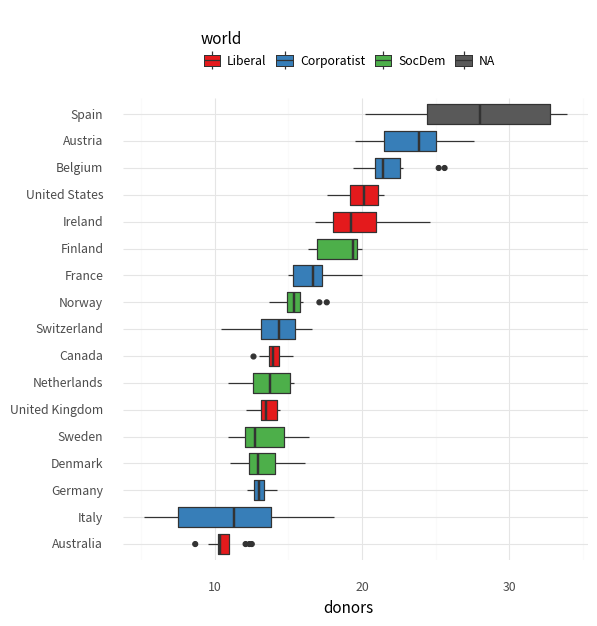

<ggplot: (8793204037720)>

In [10]:
# manual color mapping
world_colors = cm.get_cmap('Set1')
world_colors = {
  str(organdata['world'].unique()[i]): rgb2hex(world_colors(i)
    ) for i in range(world_colors.N) if i < organdata['world'].unique().shape[0]
}
world_colors['NA'] = '#595959'

p = ggplot(
    organdata.merge(order_countries, on='country'),
    aes(x='reorder(country, rank_donors)', y='donors', fill='world')
)
p + geom_boxplot() + labs(x=None) + coord_flip(
) + theme(legend_position='top') + scale_fill_manual(world_colors)

## Fig. 5.10

/usr/local/lib/python3.8/dist-packages/plotnine/layer.py:401: PlotnineWarning: geom_point : Removed 34 rows containing missing values.


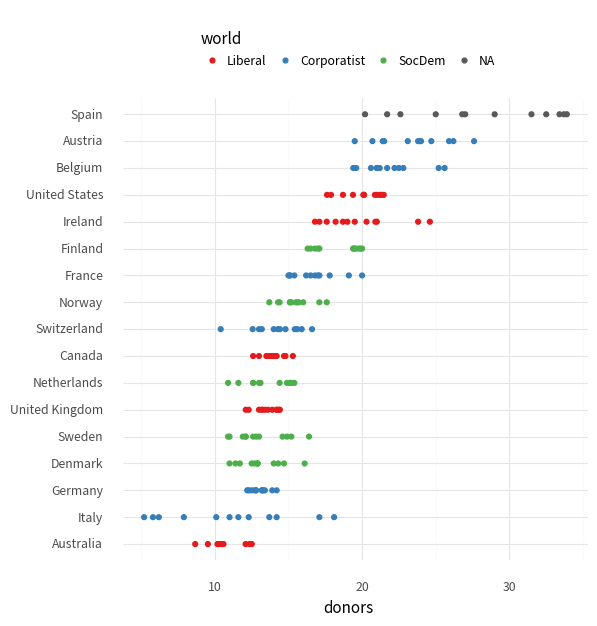

<ggplot: (8793204508546)>

In [11]:
p = ggplot(
    organdata.merge(order_countries, on='country'),
    aes(x='reorder(country, rank_donors)', y='donors', color='world')
)
p + geom_point() + labs(x=None) + coord_flip() + theme(legend_position="top"
) + scale_color_manual(world_colors)

## Fig. 5.11

/usr/local/lib/python3.8/dist-packages/plotnine/layer.py:401: PlotnineWarning: geom_jitter : Removed 34 rows containing missing values.


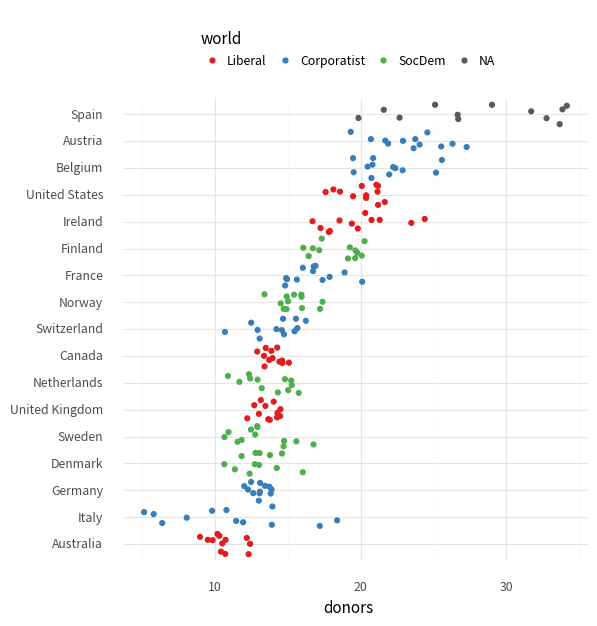

<ggplot: (8793204016267)>

In [12]:
p = ggplot(
    organdata.merge(order_countries, on='country'),
    aes(x='reorder(country, rank_donors)', y='donors', color='world')
)
p + geom_jitter() + labs(x=None) + coord_flip() + theme(legend_position="top"
) + scale_color_manual(world_colors)

## Fig. 5.12

/usr/local/lib/python3.8/dist-packages/plotnine/layer.py:401: PlotnineWarning: geom_jitter : Removed 34 rows containing missing values.


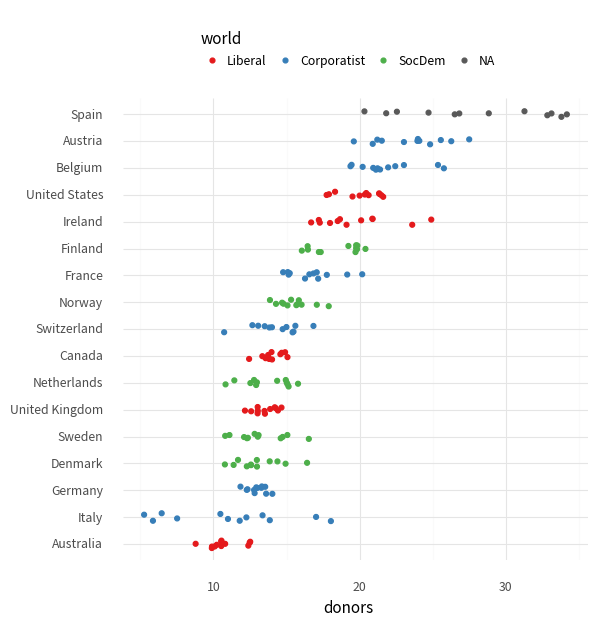

<ggplot: (8793203720644)>

In [13]:
p = ggplot(
    organdata.merge(order_countries, on='country'),
    aes(x='reorder(country, rank_donors)', y='donors', color='world')
)
p + geom_jitter(position=position_jitter(width=0.15)) + labs(
  x=None
) + coord_flip() + theme(legend_position="top"
) + scale_color_manual(world_colors)

## Fig. 5.13

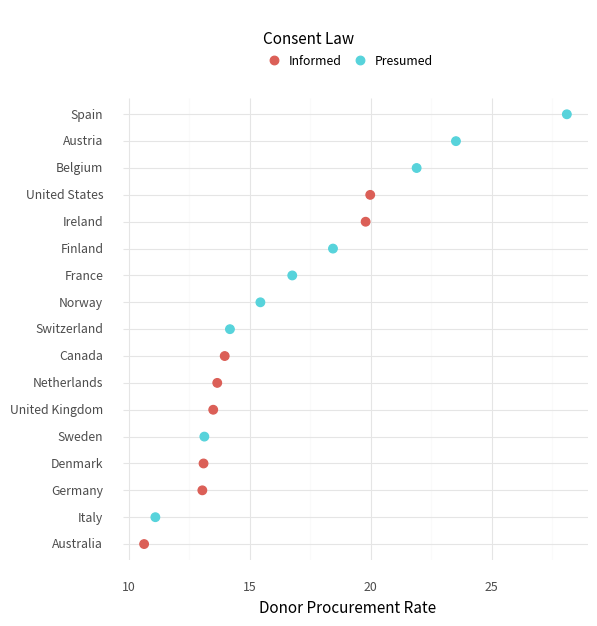

<ggplot: (8793204459731)>

In [14]:
by_country = organdata.groupby(
  ['consent_law', 'country']).agg(['mean', 'std']
).reset_index()
by_country.columns = [
  '_'.join(filter(lambda x: x !='', t)) for t in by_country.columns
]
by_country = by_country.rename(columns={'donors_std': 'donors_sd'})

p = ggplot(
  by_country,
  aes(x='donors_mean', y='reorder(country, donors_mean)', color='consent_law')
)
p + geom_point(size=3) + labs(
  x="Donor Procurement Rate",
  y="",
  color="Consent Law"
  ) + theme(legend_position="top")


## Fig. 5.14

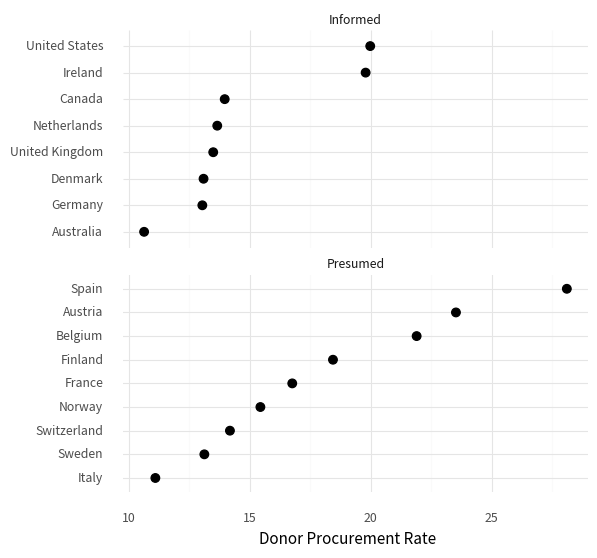

<ggplot: (8793204498966)>

In [15]:
p = ggplot(
    by_country,
    aes(x='donors_mean', y='reorder(country, donors_mean)')
)
p + geom_point(size=3) + facet_wrap(
  'consent_law', scales="free_y", ncol=1
) + labs(
  x="Donor Procurement Rate",
  y=""
)

## Fig. 5.15

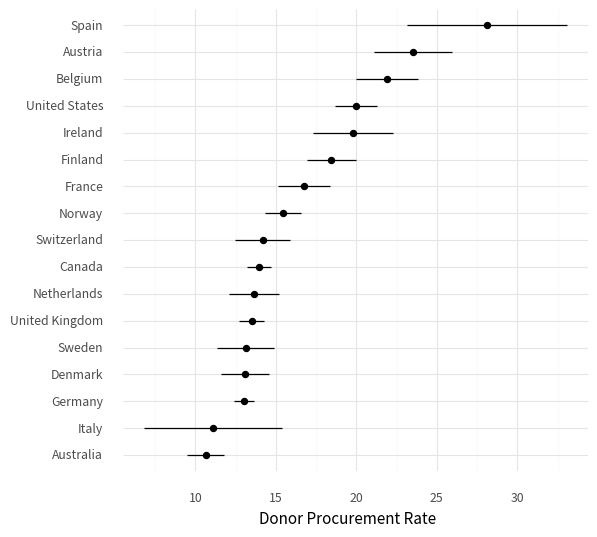

<ggplot: (8793204572775)>

In [16]:
p = ggplot(
    by_country,
    aes(x='reorder(country, donors_mean)', y='donors_mean')
)
p + geom_pointrange(
  aes(ymin='donors_mean - donors_sd',
      ymax='donors_mean + donors_sd')
) + labs(
  x="", y="Donor Procurement Rate") + coord_flip()

## Fig. 5.16

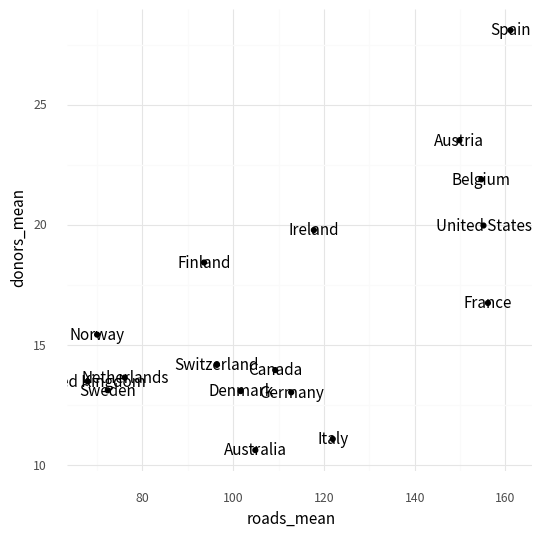

<ggplot: (8793203483127)>

In [17]:
p = ggplot(by_country, aes(x='roads_mean', y='donors_mean'))
p + geom_point() + geom_text(aes(label='country'))

## Fig. 5.17

NOTE: you need to specify `ha` instaed of `hjust`. Similary `hjust` needs to be replaced with `va`.

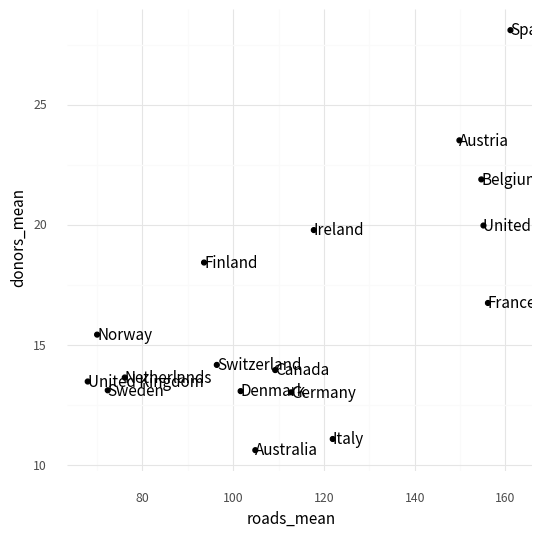

<ggplot: (8793203423790)>

In [18]:
p = ggplot(by_country, aes(x='roads_mean', y='donors_mean'))
p + geom_point() + geom_text(aes(label='country'), ha='left')

## Fig. 5.18

NOTE: Currently (v0.8) `ggrepel::geom_text_repel` is not available in plotnine.
Alternatively you can use `adjust_text` argument with adjustText package,
but this is not a complete substitution of ggrepel.

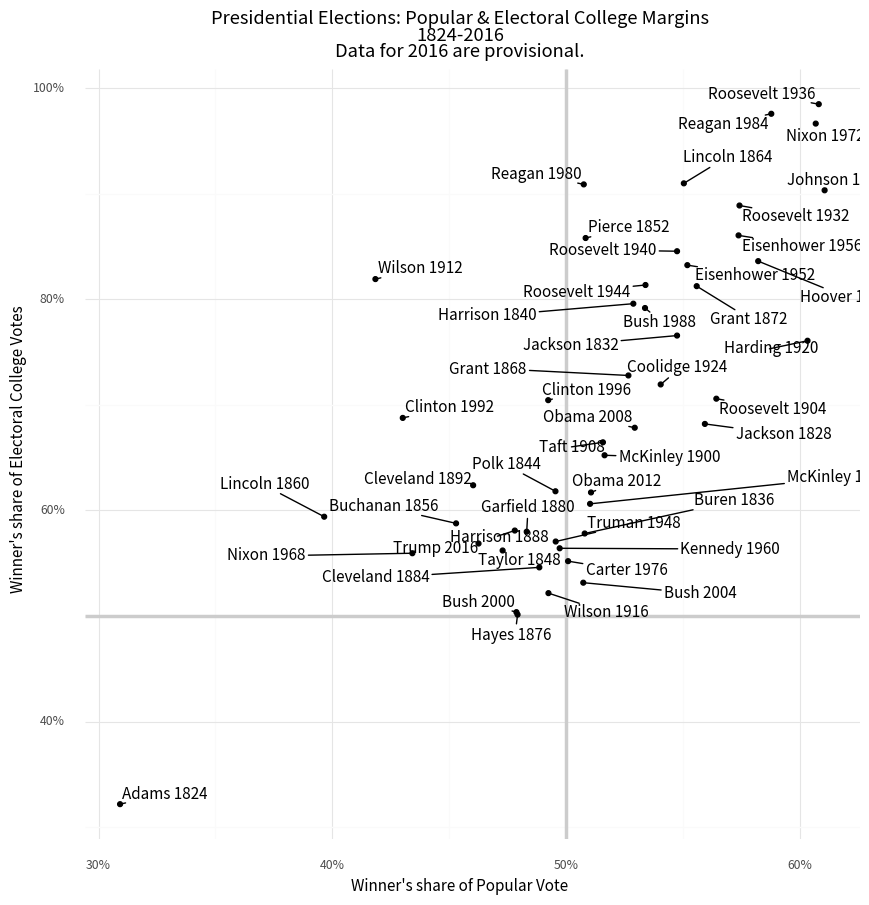

<ggplot: (8793203421730)>

In [19]:
p_title = "Presidential Elections: Popular & Electoral College Margins"
p_subtitle = "1824-2016"
p_caption = "Data for 2016 are provisional."
x_label = "Winner's share of Popular Vote"
y_label = "Winner's share of Electoral College Votes"

p = ggplot(
  elections_historic,
  aes(x='popular_pct', y='ec_pct', label='winner_label')
)
p + geom_hline(
  yintercept=0.5, size=1.4, color=colors.get('gray80')
  ) + geom_vline(
    xintercept=0.5, size=1.4, color=colors.get('gray80')
  ) + geom_point() + geom_text(
    nudge_x=0.1, nudge_y=0.1, adjust_text={'arrowprops': {'arrowstyle': '-'}}
  ) + scale_x_continuous(
    labels=percent_format()
  ) + scale_y_continuous(
    labels=percent_format()
  ) + labs(
    x=x_label,
    y=y_label,
    title='\n'.join([p_title, p_subtitle, p_caption]),
    subtitle=p_subtitle,
    caption=p_caption
) + theme(figure_size = (10, 10))

## Fig. 5.19

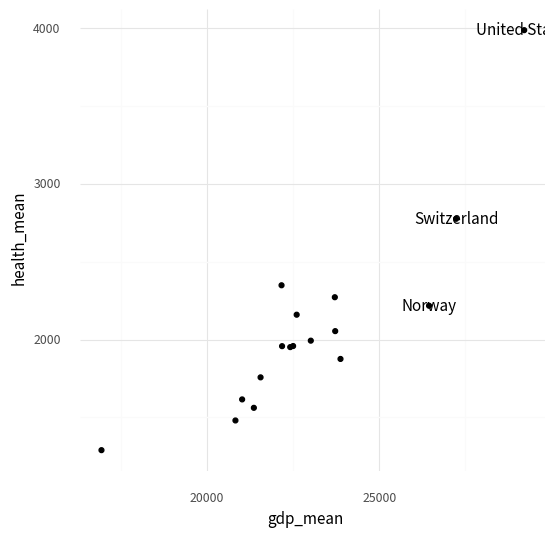

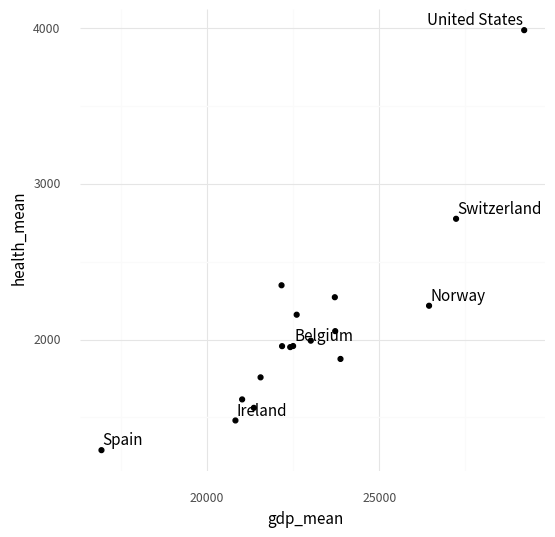

In [20]:
p = ggplot(by_country, aes(x='gdp_mean', y='health_mean'))
(
  p + geom_point() + geom_text(
    by_country.loc[lambda d: d['gdp_mean'] > 25000],
    aes(label='country')
  )
).draw();

p = ggplot(by_country, aes(x='gdp_mean', y='health_mean'))
(
  p + geom_point(
  ) + geom_text(
    by_country.loc[lambda d: (d['gdp_mean'] > 25000) | (
      d['health_mean'] < 1500
    ) | (d['country'].isin(['Belgium']))],
    aes(label='country'),
    adjust_text={'arrowproprs': {'arrowstyle': '-'}}
  )
).draw();

## Fig. 5.20

/usr/local/lib/python3.8/dist-packages/plotnine/layer.py:401: PlotnineWarning: geom_point : Removed 34 rows containing missing values.


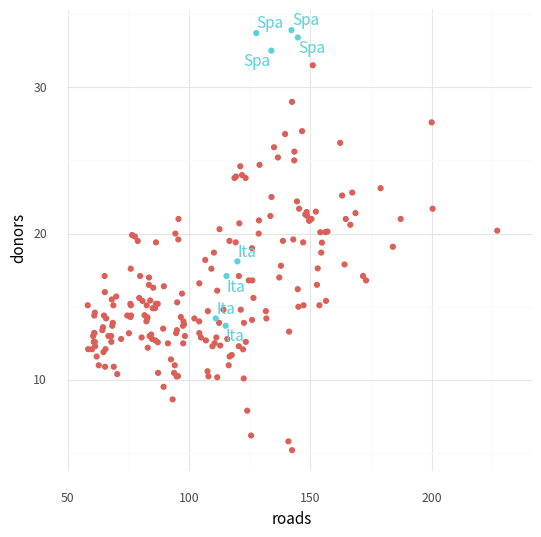

<ggplot: (8793203836365)>

In [21]:
organdata = organdata.assign(ind=lambda d: (
  d['ccode'].isin(['Ita', 'Spa'])) & (d['year'].dt.year > 1998))

p = ggplot(organdata, aes(x='roads', y='donors', color='ind'))
p + geom_point() + geom_text(
  organdata.loc[lambda d: d['ind']],
  aes(label='ccode'),
  adjust_text={'arrowproprs': {'arrowstyle': '-'}}
  ) + guides(
  label=False, color=False)

## Fig. 5.21

/usr/local/lib/python3.8/dist-packages/plotnine/layer.py:401: PlotnineWarning: geom_point : Removed 34 rows containing missing values.


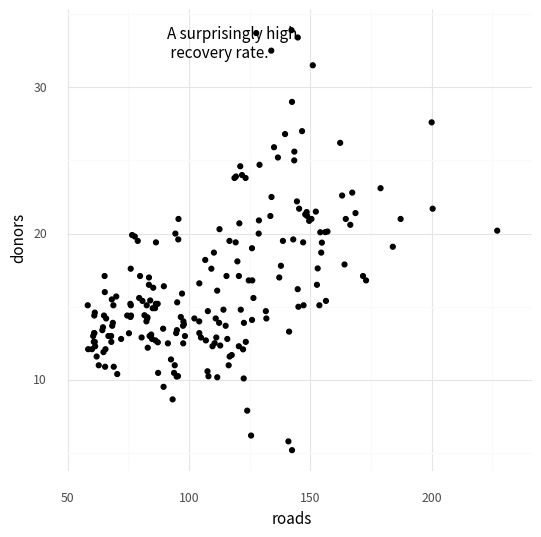

<ggplot: (8793203451408)>

In [22]:
p = ggplot(organdata, aes(x='roads', y='donors'))
p + geom_point(
) + annotate(
  geom="text", x=91, y=33,
  label="A surprisingly high \n recovery rate.",
  ha='left'
)

## Fig. 5.22

/usr/local/lib/python3.8/dist-packages/plotnine/layer.py:401: PlotnineWarning: geom_point : Removed 34 rows containing missing values.


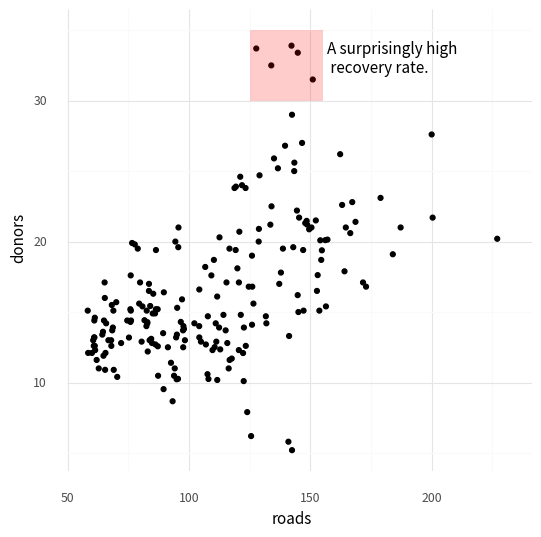

<ggplot: (8793204527851)>

In [23]:
p = ggplot(organdata, aes(x='roads', y='donors'))
p + geom_point() + annotate(
  geom='rect', xmin=125, xmax=155,
  ymin=30, ymax=35, fill='red', alpha=0.2
) + annotate(
  geom='text', x=157, y=33,
  label = "A surprisingly high \n recovery rate.",
  ha = 'left'
)

## Fig. 5.23

/usr/local/lib/python3.8/dist-packages/plotnine/layer.py:401: PlotnineWarning: geom_point : Removed 34 rows containing missing values.


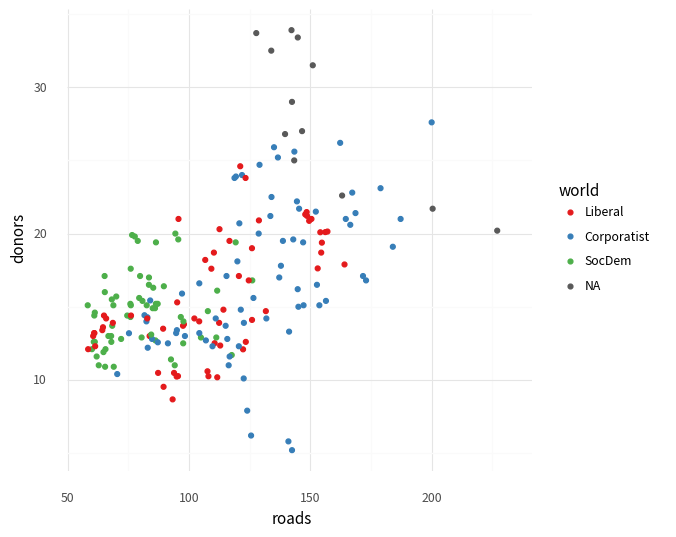

<ggplot: (8793204506046)>

In [24]:
p = ggplot(organdata, aes(x='roads', y='donors', color='world'))
p + geom_point() + scale_color_manual(world_colors)

## Fig. 5.25

/usr/local/lib/python3.8/dist-packages/plotnine/layer.py:401: PlotnineWarning: geom_point : Removed 34 rows containing missing values.


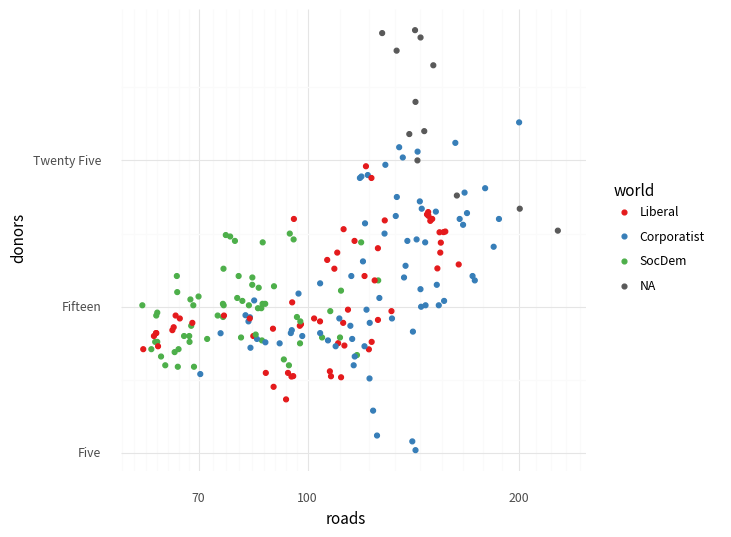

<ggplot: (8793204026757)>

In [25]:
p = ggplot(organdata, aes(x='roads', y='donors', color='world'))
p + geom_point() + scale_x_log10(
) + scale_y_continuous(
  breaks = [5, 15, 25],
  labels = ["Five", "Fifteen", "Twenty Five"]
) + scale_color_manual(world_colors)

## Fig. 5.26

NOTE: I deem that the original code is not good in the view of consistency of value-label correspondings. So I changed the labels by using dictionary which is independent from the order of elements.

/usr/local/lib/python3.8/dist-packages/plotnine/layer.py:401: PlotnineWarning: geom_point : Removed 34 rows containing missing values.


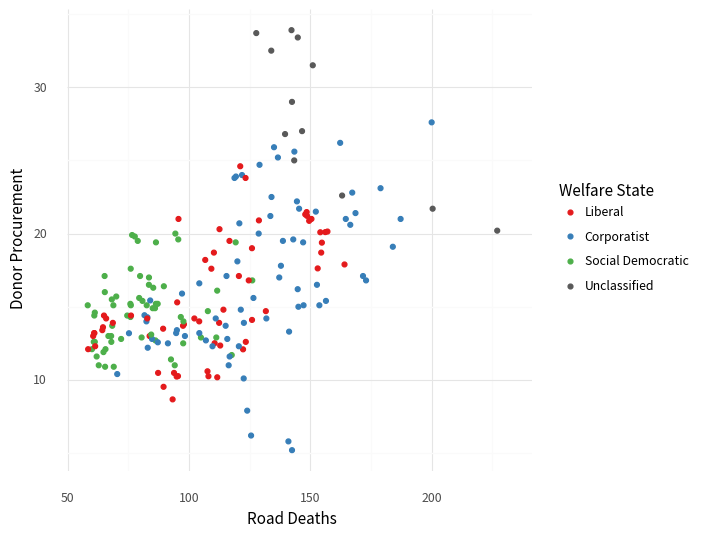

<ggplot: (8793204398228)>

In [26]:
p = ggplot(organdata, aes(x='roads', y='donors', color='world'))
p + geom_point() + scale_color_manual(
    world_colors,
    labels = lambda x: [{"Corporatist": "Corporatist",
                         "Liberal": "Liberal",
                         "SocDem": "Social Democratic",
                         "NA": "Unclassified"}[e] for e in x]
) + labs(
  x="Road Deaths",
  y="Donor Procurement",
  color="Welfare State")

## Fig. 5.27

/usr/local/lib/python3.8/dist-packages/plotnine/layer.py:401: PlotnineWarning: geom_point : Removed 34 rows containing missing values.


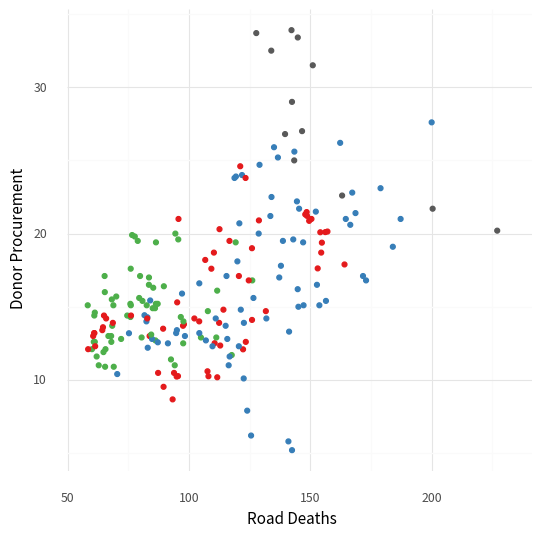

<ggplot: (8793204405035)>

In [27]:
p = ggplot(
  organdata,
  aes(x='roads', y='donors', color='world'))
p + geom_point() + labs(
  x="Road Deaths",
  y="Donor Procurement") + guides(color=False
) + scale_color_manual(world_colors)